In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Colab/mask3.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: Dataset/with_mask/1890.png  
  inflating: Dataset/with_mask/1891.png  
  inflating: Dataset/with_mask/1892.png  
  inflating: Dataset/with_mask/1893.png  
  inflating: Dataset/with_mask/1894.png  
  inflating: Dataset/with_mask/1895.png  
  inflating: Dataset/with_mask/1896.png  
  inflating: Dataset/with_mask/1897.png  
  inflating: Dataset/with_mask/1898.png  
  inflating: Dataset/with_mask/1899.png  
  inflating: Dataset/with_mask/19.png  
  inflating: Dataset/with_mask/190.png  
  inflating: Dataset/with_mask/1900.png  
  inflating: Dataset/with_mask/1901.png  
  inflating: Dataset/with_mask/1902.png  
  inflating: Dataset/with_mask/1903.png  
  inflating: Dataset/with_mask/1904.png  
  inflating: Dataset/with_mask/1905.png  
  inflating: Dataset/with_mask/1906.png  
  inflating: Dataset/with_mask/1907.png  
  inflating: Dataset/with_mask/1908.png  
  inflating: Dataset/with_mask/1909.png  
  inflating: Dataset/w

**Importing the Dependencies**

In [37]:
import os
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import glob
import shutil
import cv2 
from PIL import Image
import PIL
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from sklearn.model_selection import train_test_split


import warnings
# Ignore waring
warnings.filterwarnings('ignore')

In [53]:
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D


without mask  -->  0

with mask  -->  1

incorected mask  -->  2



In [38]:
name_list = glob.glob("/content/Dataset/without_mask/*")

In [39]:

X = []
y = []
for name in name_list:
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #img = img.convert('RGB')
  img = cv2.resize(img,(128,128))
  X.append((img))
  y.append(0)
len(X)


2994

In [40]:
name_list = glob.glob("/content/Dataset/with_mask/*")

In [41]:
for name in name_list:
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #img = img.convert('RGB')
  img = cv2.resize(img,(128,128))
  X.append((img))
  y.append(1)
len(X)

5988

In [42]:
name_list = glob.glob("/content/Dataset/mask_weared_incorrect/*")

In [43]:
for name in name_list:
  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #img = img.convert('RGB')
  img = cv2.resize(img,(128,128))
  X.append((img))
  y.append(3)
len(X)

8982

In [44]:
# np.array
X = np.array(X)/255.
y = np.array(y)

**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [45]:
X[0].shape

(128, 128)

In [46]:
print(X.shape)
print(y.shape)

(8982, 128, 128)
(8982,)


In [47]:
print(y)

[0 0 0 ... 3 3 3]


**Train Test Split**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(8982, 128, 128) (7185, 128, 128) (1797, 128, 128)


**Building a Convolutional Neural Networks (CNN)**

Chuẩn hóa dữ liệu output:

In [50]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

Xây dựng mô hình CNN:

In [61]:
inp = Input(shape = (128,128,1))
cnn = Conv2D(filters =10,kernel_size = 3,activation ='relu')(inp)
pooling = MaxPooling2D(pool_size =(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters =20, kernel_size =4,activation ='relu')(drop)
pooling = MaxPooling2D(pool_size =(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = cnn = Conv2D(filters =38, kernel_size =4,activation ='relu')(drop)
pooling = MaxPooling2D(pool_size =(2,2))(cnn)

f =Flatten()(pooling)

fc1 = Dense(units =38, activation ='relu')(f)
fc2 = Dense(units =22, activation ='relu')(fc1)
out = Dense(units =3, activation ='softmax')(fc2)

model =Model(inputs = inp,outputs =out)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 10)      100       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 10)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 63, 63, 10)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 20)        3220      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 20)       0         
 g2D)                                                      

Huấn luyện mô hình:

In [62]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer1, loss = 'categorical_crossentropy',metrics =['accuracy'])

history = model.fit(X_train,y_train,batch_size =32, epochs =50,validation_data =(X_test,y_test))

Epoch 1/50
225/225 [==============================] - 6s 15ms/step - loss: 0.9236 - accuracy: 0.4998 - val_loss: 0.8200 - val_accuracy: 0.6483
Epoch 2/50
225/225 [==============================] - 3s 12ms/step - loss: 0.7133 - accuracy: 0.7147 - val_loss: 0.6677 - val_accuracy: 0.7596
Epoch 3/50
225/225 [==============================] - 2s 11ms/step - loss: 0.5604 - accuracy: 0.7822 - val_loss: 0.5834 - val_accuracy: 0.7607
Epoch 4/50
225/225 [==============================] - 3s 11ms/step - loss: 0.4599 - accuracy: 0.8193 - val_loss: 0.4711 - val_accuracy: 0.8130
Epoch 5/50
225/225 [==============================] - 2s 11ms/step - loss: 0.4015 - accuracy: 0.8493 - val_loss: 0.5378 - val_accuracy: 0.7713
Epoch 6/50
225/225 [==============================] - 3s 11ms/step - loss: 0.3459 - accuracy: 0.8675 - val_loss: 0.3941 - val_accuracy: 0.8408
Epoch 7/50
225/225 [==============================] - 3s 12ms/step - loss: 0.3198 - accuracy: 0.8811 - val_loss: 0.3318 - val_accuracy: 0.8820

**Model Evaluation**

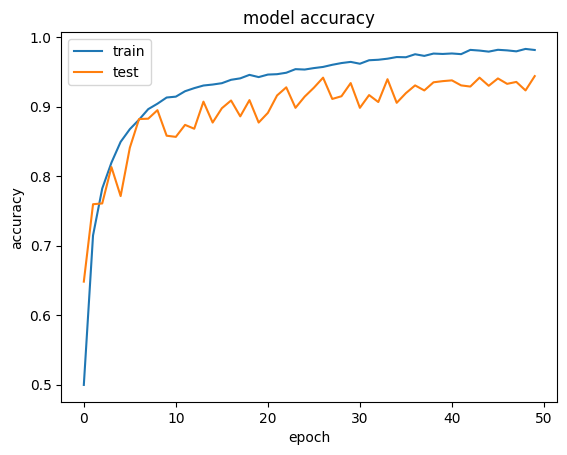

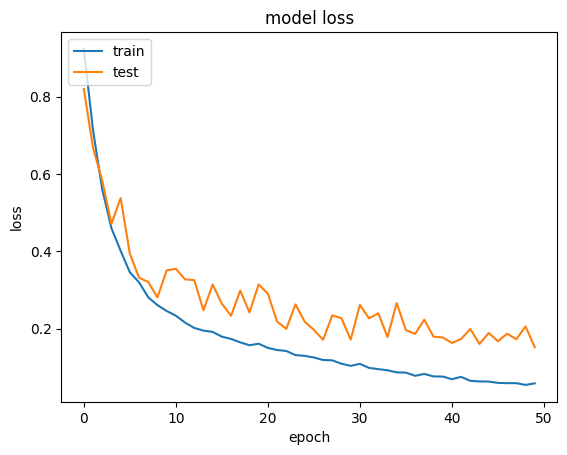

In [64]:
from matplotlib import pyplot  as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [65]:
model.save('model1.h5')

In [66]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/model1.h5')

(128, 128, 3)


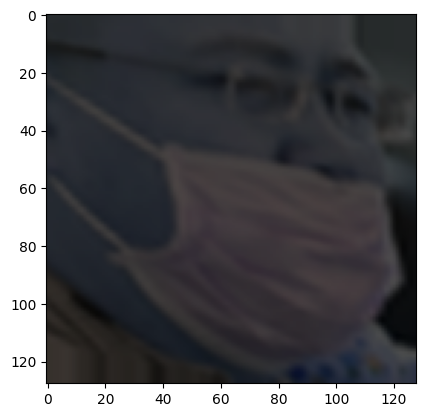

In [72]:
import cv2
img = cv2.imread('/content/Dataset/mask_weared_incorrect/1896.png')
print(img.shape)
plt.imshow(img)

(128, 128)


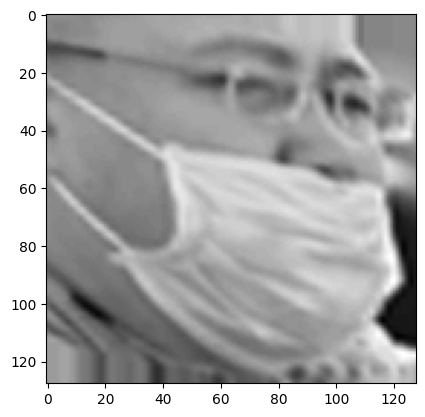

In [73]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_new = cv2.resize(gray_img,(128,128))
print(gray_img.shape)
plt.imshow(img_new, cmap ='gray')

In [74]:
img_scaled = np.array([img_new/255.])
print(img_scaled.shape)
y_hat = model1.predict(img_scaled)
print(y_hat)
for i in range(y_hat.shape[1]):
  max_value=np.max(y_hat)
  if y_hat[0][i]==max_value:
    y_hat[0][i]=1
  else:
    y_hat[0][i]=0
print(y_hat)
print(np.argmax(y_hat))

(1, 128, 128)
1/1 [==============================] - 0s 27ms/step
[[2.3301155e-04 3.0524137e-03 9.9671459e-01]]
[[0. 0. 1.]]
2


(128, 128, 3)
(128, 128)
(1, 128, 128)
1/1 [==============================] - 0s 31ms/step
[[5.3300309e-01 4.6699664e-01 2.3296481e-07]]
[[1. 0. 0.]]
0


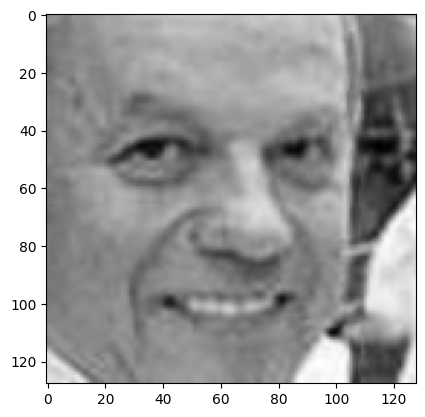

In [77]:
import cv2
img = cv2.imread('/content/Dataset/without_mask/1201.png')
print(img.shape)
plt.imshow(img)
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_new = cv2.resize(gray_img,(128,128))
print(gray_img.shape)
plt.imshow(img_new, cmap ='gray')
img_scaled = np.array([img_new/255.])
print(img_scaled.shape)
y_hat = model1.predict(img_scaled)
print(y_hat)
for i in range(y_hat.shape[1]):
  max_value=np.max(y_hat)
  if y_hat[0][i]==max_value:
    y_hat[0][i]=1
  else:
    y_hat[0][i]=0
print(y_hat)
print(np.argmax(y_hat))

**Predictive System**

Path of the image to be predicted: /content/Dataset/with_mask/1023.png


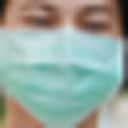

ValueError: ignored

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import joblib

In [ ]:
model = joblib.load('/content/drive/My Drive/models/modelmask.pkl')

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
input_image = cv2.imread('/content/real_01071.jpg')

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python


In [ ]:
import cv2

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load the pre-trained face recognition model
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer.yml')

# Open the video stream
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # For each face, recognize the person
    for (x, y, w, h) in faces:
        # Extract the face region from the grayscale frame
        face = gray[y:y+h, x:x+w]

        # Recognize the person in the face region
        label, confidence = recognizer.predict(face)

        # Draw a rectangle around the face and display the person's name
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, f'Person {label}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    # Wait for a key press
    if cv2.waitKey(1) == ord('q'):
        break

# Release the video stream and close all windows
cap.release()
cv2.destroyAllWindows()
